### Importing Libraries

In [151]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


### Scraping Data from Wikipedia into a DataFrame

In [152]:
# setting up connection to wikipedia to parse data from the html
url = 'https://en.wikipedia.org/wiki/Neighborhoods_of_Vilnius'
data = requests.get(url)
soup = BeautifulSoup(data.content, 'html.parser')

In [174]:
# creating lists and iterating through wikipedia data
neighborhoods = []
cords = []
lat = []
lon = []

table = soup.find('table', {'class': 'sortable wikitable'})

# append the data into the list
for row in table.findAll('tr')[1:]:
    cells = row.findAll('a')
    for i in cells:
        neighborhoods.append(i.get_text().strip())
        

for row in table.findAll('tr')[1:]:
    cells = row.findAll('td')[5:]
    for i in cells:
        cords.append((i.get_text().strip()))

lat = cords[::2]
lon = cords[1::2]    

In [175]:
# creating new dataframe from the above lists

d = {"Neighborhood": neighborhoods, "Latitude": lat, "Longitude": lon}

pre_vno_df = pd.DataFrame(d)

pre_vno_df.head()

,Neighborhood,Latitude,Longitude
0,Verkiai,54.708707,25.284686
1,Antakalnis,54.701126,25.308957
2,Pašilaičiai,54.725942,25.231328
3,Fabijoniškės,54.723397,25.249529
4,Pilaitė,54.708126,25.175803


In [176]:
import geopy.distance

pre_vno_df['Coordinates'] = pre_vno_df[['Latitude', 'Longitude']].apply(tuple, axis=1)

pre_vno_df.head()

,Neighborhood,Latitude,Longitude,Coordinates
0,Verkiai,54.708707,25.284686,"(54.708707, 25.284686)"
1,Antakalnis,54.701126,25.308957,"(54.701126, 25.308957)"
2,Pašilaičiai,54.725942,25.231328,"(54.725942, 25.231328)"
3,Fabijoniškės,54.723397,25.249529,"(54.723397, 25.249529)"
4,Pilaitė,54.708126,25.175803,"(54.708126, 25.175803)"


In [177]:
vno_center = (54.6872, 25.2797)
distance = []
for i in pre_vno_df.iloc[:,3]:
    distance.append(geopy.distance.geodesic(i, vno_center).km)

pre_vno_df['DistanceFromCenter'] = distance
pre_vno_df

,Neighborhood,Latitude,Longitude,Coordinates,DistanceFromCenter
0,Verkiai,54.708707,25.284686,"(54.708707, 25.284686)",2.415601
1,Antakalnis,54.701126,25.308957,"(54.701126, 25.308957)",2.441722
2,Pašilaičiai,54.725942,25.231328,"(54.725942, 25.231328)",5.321808
3,Fabijoniškės,54.723397,25.249529,"(54.723397, 25.249529)",4.474206
4,Pilaitė,54.708126,25.175803,"(54.708126, 25.175803)",7.092168
5,Justiniškės,54.717905,25.220236,"(54.717905, 25.220236)",5.135968
6,Viršuliškės,54.717867,25.220222,"(54.717867, 25.220222)",5.133829
7,Šeškinė,54.715694,25.244574,"(54.715694, 25.244574)",3.897302
8,Šnipiškės,54.692956,25.285007,"(54.692956, 25.285007)",0.726413
9,Žirmūnai,54.723249,25.297213,"(54.723249, 25.297213)",4.168681


In [178]:
vno_df = pre_vno_df.loc[pre_vno_df['DistanceFromCenter'] <= 5.5].reset_index(drop=True)
vno_df.head()

,Neighborhood,Latitude,Longitude,Coordinates,DistanceFromCenter
0,Verkiai,54.708707,25.284686,"(54.708707, 25.284686)",2.415601
1,Antakalnis,54.701126,25.308957,"(54.701126, 25.308957)",2.441722
2,Pašilaičiai,54.725942,25.231328,"(54.725942, 25.231328)",5.321808
3,Fabijoniškės,54.723397,25.249529,"(54.723397, 25.249529)",4.474206
4,Justiniškės,54.717905,25.220236,"(54.717905, 25.220236)",5.135968


### Creating a map of Vilnius with neighborhoods

In [179]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# setting Vilnius coordinates
address = 'Vilnius, Lithuania'

geolocator = Nominatim(user_agent="vilnius")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vilnius, Lithuania {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vilnius, Lithuania 54.6870458, 25.2829111.


In [180]:
# creating map of Vilnius using latitude and longitude values
map_vno = folium.Map(location=[latitude, longitude], zoom_start=11)

# adding markers to the map
for lat, lng, neighborhood in zip(vno_df['Latitude'], vno_df['Longitude'], vno_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vno)  
    
map_vno

### Adding Foursqaure API to explore the neighborhood data

In [181]:
CLIENT_ID = 'x'
CLIENT_SECRET = 'y'
VERSION = '20180605'

In [182]:
# Exploring neighberhood data within a radius of 800 meters, limiting venues to top 100
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    LIMIT = 100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [183]:
# running the function and saving output to a new dataframe
vno_venues = getNearbyVenues(names=vno_df['Neighborhood'],
                                   latitudes=vno_df['Latitude'],
                                   longitudes=vno_df['Longitude']
                                  )

Verkiai
Antakalnis
Pašilaičiai
Fabijoniškės
Justiniškės
Viršuliškės
Šeškinė
Šnipiškės
Žirmūnai
Karoliniškės
Žvėrynas
Lazdynai
Vilkpėdė
Naujamiestis
Senamiestis
Naujininkai
Rasos


In [185]:
# checking results
print(vno_venues.shape)
vno_venues.head()

(825, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Verkiai,54.708707,25.284686,Pizza Verde,54.707070,25.285050,Pizza Place
1,Verkiai,54.708707,25.284686,GymPlius,54.703436,25.282497,Gym
2,Verkiai,54.708707,25.284686,PANK'olis,54.711114,25.292318,Buffet
3,Verkiai,54.708707,25.284686,Alaus studija,54.707954,25.295803,Bar
4,Verkiai,54.708707,25.284686,Ulonų turgelis,54.709531,25.292245,Farmers Market


In [186]:
# unique results for each neighborhood
vno_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Antakalnis,28,28,28,28,28,28
Fabijoniškės,36,36,36,36,36,36
Justiniškės,14,14,14,14,14,14
Karoliniškės,15,15,15,15,15,15
Lazdynai,11,11,11,11,11,11
Naujamiestis,100,100,100,100,100,100
Naujininkai,25,25,25,25,25,25
Pašilaičiai,25,25,25,25,25,25
Rasos,100,100,100,100,100,100


In [187]:
# checking number of unique Venue Categories
print('There are {} uniques categories.'.format(len(vno_venues['Venue Category'].unique())))

There are 166 uniques categories.


### Analyzing each Neighborhood

In [188]:
# one hot encoding
vno_onehot = pd.get_dummies(vno_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
vno_onehot['Neighborhood'] = vno_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [vno_onehot.columns[-1]] + list(vno_onehot.columns[:-1])
vno_onehot = vno_onehot[fixed_columns]

vno_onehot.head()

,Neighborhood,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Boarding House,Bookstore,Boutique,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Theater,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Department Store,Dessert Shop,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,German Restaurant,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hotel,IT Services,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Kebab Restaurant,Lake,Laser Tag,Lebanese Restaurant,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Motel,Movie Theater,Museum,Music Venue,Noodle House,Office,Opera House,Optical Shop,Outlet Store,Paintball Field,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plaza,Polish Restaurant,Pool,Pool Hall,Pub,Racetrack,Ramen Restaurant,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Soccer Field,Soccer Stadium,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,TV Station,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Track,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,Verkiai,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Verkiai,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Verkiai,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Verkiai,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Verkiai,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [189]:
print(vno_onehot.shape)

(825, 167)


In [190]:
# grouping rows of each neighborhood by taking the mean of the frequence of occurence of each category
vno_grouped = vno_onehot.groupby('Neighborhood').mean().reset_index()
vno_grouped

,Neighborhood,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Boarding House,Bookstore,Boutique,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Theater,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Department Store,Dessert Shop,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,German Restaurant,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hotel,IT Services,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Kebab Restaurant,Lake,Laser Tag,Lebanese Restaurant,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Motel,Movie Theater,Museum,Music Venue,Noodle House,Office,Opera House,Optical Shop,Outlet Store,Paintball Field,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plaza,Polish Restaurant,Pool,Pool Hall,Pub,Racetrack,Ramen Restaurant,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Soccer Field,Soccer Stadium,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,TV Station,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Track,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,Antakalnis,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.035714,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.035714,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.035714,0.035714,0.035714,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.071429,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.071429,0.00,0.00,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.035714,0.00,0.00,0.000000,0.035714,0.071429,0.000000,0.000000,0.035714,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.035714,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.035714,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.107143,0.00,0.000000,0.035714,0.071429,0.000000,0.035714,0.000000,0.000000,0.000000,0.00,0.00,0.035714,0.035714,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.035714,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00
1,Fabijoniškės,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.027778,0.000000,0.00,0.000000,0.027778,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.027778,0.000000,0.027778,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.027778,0.00,0.027778,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,0.027778,0.00,0.027778,0.055556,0.00,0.00,0.083333,0.027778,0.027778,0.055556,0.000000,0

In [191]:
# printing each neighborhood with top 5 most common venues
num_top_venues = 5

for hood in vno_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = vno_grouped[vno_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Antakalnis----
                  venue  freq
0                  Park  0.11
1     Electronics Store  0.07
2           Coffee Shop  0.07
3           Pizza Place  0.07
4  Gym / Fitness Center  0.07


----Fabijoniškės----
                    venue  freq
0             Pizza Place  0.08
1    Fast Food Restaurant  0.08
2  Furniture / Home Store  0.06
3       Food & Drink Shop  0.06
4           Grocery Store  0.06


----Justiniškės----
                 venue  freq
0    Convenience Store  0.14
1          Supermarket  0.14
2  Sporting Goods Shop  0.07
3                  Gym  0.07
4          Flea Market  0.07


----Karoliniškės----
           venue  freq
0  Grocery Store  0.20
1    Bus Station  0.07
2     Food Truck  0.07
3           Pool  0.07
4     Restaurant  0.07


----Lazdynai----
                  venue  freq
0         Grocery Store  0.18
1              Pharmacy  0.09
2  Fast Food Restaurant  0.09
3           Bus Station  0.09
4              Bus Stop  0.09


----Naujamiestis----
       

#### Placing results into the dataframe and displaying top 10 venues for each neighborhood

In [206]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [207]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = vno_grouped['Neighborhood']

for ind in np.arange(vno_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vno_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Antakalnis,Park,Gym / Fitness Center,Electronics Store,Coffee Shop,Pizza Place,Gym,Shopping Mall,Bus Line,Bus Station,Bus Stop
1,Fabijoniškės,Pizza Place,Fast Food Restaurant,Electronics Store,Grocery Store,Food & Drink Shop,Gym / Fitness Center,Furniture / Home Store,Market,Flower Shop,Flea Market
2,Justiniškės,Convenience Store,Supermarket,Furniture / Home Store,Shopping Mall,Sporting Goods Shop,Flea Market,Market,Cosmetics Shop,Bus Station,Pizza Place
3,Karoliniškės,Grocery Store,Pool,Restaurant,Fast Food Restaurant,Sports Club,TV Station,Office,Food Truck,Bus Line,Bus Station
4,Lazdynai,Grocery Store,Bus Stop,Pizza Place,Caucasian Restaurant,Gym,Pharmacy,Fast Food Restaurant,Park,Bus Station,Food Court
5,Naujamiestis,Coffee Shop,Bar,Museum,Restaurant,Cocktail Bar,Park,Hotel,Bagel Shop,Beer Bar,Dessert Shop
6,Naujininkai,Fast Food Restaurant,Pizza Place,Grocery Store,Supermarket,Paintball Field,Clothing Store,Coffee Shop,Motel,Eastern European Restaurant,Electronics Store
7,Pašilaičiai,Pizza Place,Electronics Store,Furniture / Home Store,Fast Food Restaurant,Pharmacy,Bed & Breakfast,Shoe Store,Soccer Field,Pet Store,Creperie
8,Rasos,Hotel,Coffee Shop,Bar,Cocktail Bar,Wine Bar,Museum,Restaurant,Dessert Shop,Beer Bar,Pub
9,Senamiestis,Coffee Shop,Bar,Museum,Restaurant,Cocktail Bar,Park,Hotel,Bagel Shop,Beer Bar,Dessert Shop


### Running Visual analysis to identify optimal number of clusters to be used in K-means algorithm

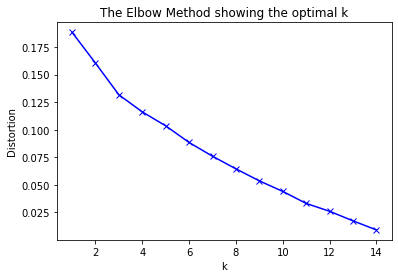

In [208]:
# elbow method
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

kmc = vno_grouped.drop('Neighborhood', 1)

distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(kmc)
    kmeanModel.fit(kmc)
    distortions.append(sum(np.min(cdist(kmc, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / kmc.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

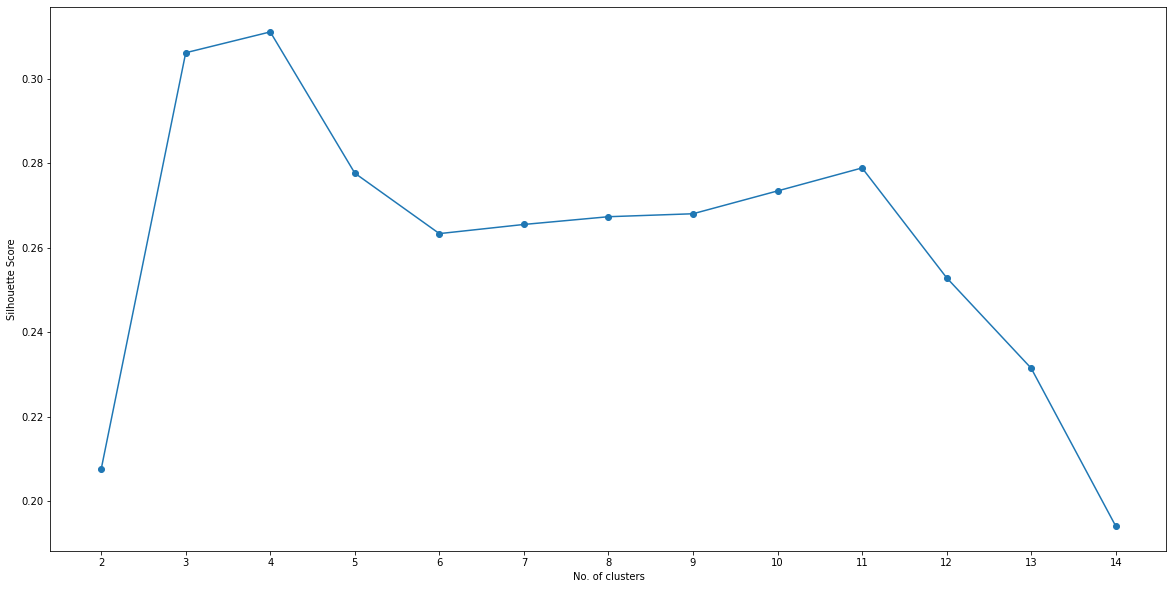

In [209]:
# running Silhouette score to confirm findings

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()
from sklearn.metrics import silhouette_score

sil = []
kmax = 15
kmc = vno_grouped.drop('Neighborhood', 1)

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax):   
    kmeans = KMeans(n_clusters = k).fit(kmc)
    labels = kmeans.labels_
    sil.append(silhouette_score(kmc, labels, metric = 'euclidean'))
    
plot(kmax, sil, "No. of clusters", "Silhouette Score")

### Time to cluster neighborhoods

In [210]:
#running K-means clustering with 4 clusters

vno_clustering2 = vno_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=4, random_state=0).fit(vno_clustering2)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 3, 0, 2, 2, 1, 3, 3, 1, 1, 1, 3, 0, 2, 1, 1, 1], dtype=int32)

In [211]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Antakalnis,Park,Gym / Fitness Center,Electronics Store,Coffee Shop,Pizza Place,Gym,Shopping Mall,Bus Line,Bus Station,Bus Stop
1,3,Fabijoniškės,Pizza Place,Fast Food Restaurant,Electronics Store,Grocery Store,Food & Drink Shop,Gym / Fitness Center,Furniture / Home Store,Market,Flower Shop,Flea Market
2,0,Justiniškės,Convenience Store,Supermarket,Furniture / Home Store,Shopping Mall,Sporting Goods Shop,Flea Market,Market,Cosmetics Shop,Bus Station,Pizza Place
3,2,Karoliniškės,Grocery Store,Pool,Restaurant,Fast Food Restaurant,Sports Club,TV Station,Office,Food Truck,Bus Line,Bus Station
4,2,Lazdynai,Grocery Store,Bus Stop,Pizza Place,Caucasian Restaurant,Gym,Pharmacy,Fast Food Restaurant,Park,Bus Station,Food Court
5,1,Naujamiestis,Coffee Shop,Bar,Museum,Restaurant,Cocktail Bar,Park,Hotel,Bagel Shop,Beer Bar,Dessert Shop
6,3,Naujininkai,Fast Food Restaurant,Pizza Place,Grocery Store,Supermarket,Paintball Field,Clothing Store,Coffee Shop,Motel,Eastern European Restaurant,Electronics Store
7,3,Pašilaičiai,Pizza Place,Electronics Store,Furniture / Home Store,Fast Food Restaurant,Pharmacy,Bed & Breakfast,Shoe Store,Soccer Field,Pet Store,Creperie
8,1,Rasos,Hotel,Coffee Shop,Bar,Cocktail Bar,Wine Bar,Museum,Restaurant,Dessert Shop,Beer Bar,Pub
9,1,Senamiestis,Coffee Shop,Bar,Museum,Restaurant,Cocktail Bar,Park,Hotel,Bagel Shop,Beer Bar,Dessert Shop


Creating new dataframe that includes clusters as well as top 10 venues for each neighborhood

In [212]:
# creating new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
vno_merged = vno_df.copy()

# merging two dataframes
vno_merged = vno_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
vno_merged.head()

,Neighborhood,Latitude,Longitude,Coordinates,DistanceFromCenter,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Verkiai,54.708707,25.284686,"(54.708707, 25.284686)",2.415601,1,Coffee Shop,Pizza Place,Gym,Bakery,Burger Joint,Supermarket,Clothing Store,Grocery Store,Gastropub,Sushi Restaurant
1,Antakalnis,54.701126,25.308957,"(54.701126, 25.308957)",2.441722,1,Park,Gym / Fitness Center,Electronics Store,Coffee Shop,Pizza Place,Gym,Shopping Mall,Bus Line,Bus Station,Bus Stop
2,Pašilaičiai,54.725942,25.231328,"(54.725942, 25.231328)",5.321808,3,Pizza Place,Electronics Store,Furniture / Home Store,Fast Food Restaurant,Pharmacy,Bed & Breakfast,Shoe Store,Soccer Field,Pet Store,Creperie
3,Fabijoniškės,54.723397,25.249529,"(54.723397, 25.249529)",4.474206,3,Pizza Place,Fast Food Restaurant,Electronics Store,Grocery Store,Food & Drink Shop,Gym / Fitness Center,Furniture / Home Store,Market,Flower Shop,Flea Market
4,Justiniškės,54.717905,25.220236,"(54.717905, 25.220236)",5.135968,0,Convenience Store,Supermarket,Furniture / Home Store,Shopping Mall,Sporting Goods Shop,Flea Market,Market,Cosmetics Shop,Bus Station,Pizza Place


In [213]:
# creating map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)
colours = ['red', 'black', 'blue', 'green', 'orange', 'brown', 'purple', 'pink', 'gray']

# adding markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vno_merged['Latitude'], vno_merged['Longitude'], vno_merged['Neighborhood'], vno_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colours[cluster],
        fill=True,
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examining each Cluster

In [221]:
# cluster 1
vno_merged.loc[vno_merged['Cluster Labels'] == 0, 
                    vno_merged.columns[[0] + list(range(4, vno_merged.shape[1]))]]

,Neighborhood,DistanceFromCenter,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Justiniškės,5.135968,0,Convenience Store,Supermarket,Furniture / Home Store,Shopping Mall,Sporting Goods Shop,Flea Market,Market,Cosmetics Shop,Bus Station,Pizza Place
5,Viršuliškės,5.133829,0,Convenience Store,Supermarket,Furniture / Home Store,Shopping Mall,Sporting Goods Shop,Flea Market,Market,Cosmetics Shop,Bus Station,Pizza Place


In [222]:
# cluster 2
vno_merged.loc[vno_merged['Cluster Labels'] == 1, 
                    vno_merged.columns[[0] + list(range(4, vno_merged.shape[1]))]]

,Neighborhood,DistanceFromCenter,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Verkiai,2.415601,1,Coffee Shop,Pizza Place,Gym,Bakery,Burger Joint,Supermarket,Clothing Store,Grocery Store,Gastropub,Sushi Restaurant
1,Antakalnis,2.441722,1,Park,Gym / Fitness Center,Electronics Store,Coffee Shop,Pizza Place,Gym,Shopping Mall,Bus Line,Bus Station,Bus Stop
7,Šnipiškės,0.726413,1,Hotel,Coffee Shop,Restaurant,Plaza,Café,Italian Restaurant,Theater,Brewery,Historic Site,Dance Studio
8,Žirmūnai,4.168681,1,Park,Coffee Shop,Convenience Store,Beach,Hotel,Diner,Gym / Fitness Center,Department Store,Shopping Mall,Shoe Store
10,Žvėrynas,2.021345,1,Coffee Shop,Clothing Store,Eastern European Restaurant,Bakery,Cosmetics Shop,Restaurant,Sushi Restaurant,Chinese Restaurant,Café,Italian Restaurant
13,Naujamiestis,0.373576,1,Coffee Shop,Bar,Museum,Restaurant,Cocktail Bar,Park,Hotel,Bagel Shop,Beer Bar,Dessert Shop
14,Senamiestis,0.372794,1,Coffee Shop,Bar,Museum,Restaurant,Cocktail Bar,Park,Hotel,Bagel Shop,Beer Bar,Dessert Shop
16,Rasos,1.063383,1,Hotel,Coffee Shop,Bar,Cocktail Bar,Wine Bar,Museum,Restaurant,Dessert Shop,Beer Bar,Pub


In [223]:
# cluster 3
vno_merged.loc[vno_merged['Cluster Labels'] == 2, 
                    vno_merged.columns[[0] + list(range(4, vno_merged.shape[1]))]]

,Neighborhood,DistanceFromCenter,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Šeškinė,3.897302,2,Grocery Store,Pizza Place,Electronics Store,Bus Station,Fast Food Restaurant,Shoe Store,Food & Drink Shop,Flea Market,Motel,Sporting Goods Shop
9,Karoliniškės,4.813054,2,Grocery Store,Pool,Restaurant,Fast Food Restaurant,Sports Club,TV Station,Office,Food Truck,Bus Line,Bus Station
11,Lazdynai,5.192434,2,Grocery Store,Bus Stop,Pizza Place,Caucasian Restaurant,Gym,Pharmacy,Fast Food Restaurant,Park,Bus Station,Food Court


In [224]:
# cluster 4
vno_merged.loc[vno_merged['Cluster Labels'] == 3, 
                    vno_merged.columns[[0] + list(range(4, vno_merged.shape[1]))]]

,Neighborhood,DistanceFromCenter,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Pašilaičiai,5.321808,3,Pizza Place,Electronics Store,Furniture / Home Store,Fast Food Restaurant,Pharmacy,Bed & Breakfast,Shoe Store,Soccer Field,Pet Store,Creperie
3,Fabijoniškės,4.474206,3,Pizza Place,Fast Food Restaurant,Electronics Store,Grocery Store,Food & Drink Shop,Gym / Fitness Center,Furniture / Home Store,Market,Flower Shop,Flea Market
12,Vilkpėdė,2.861739,3,Gym,Grocery Store,Hotel,American Restaurant,Convenience Store,Shoe Store,Cafeteria,Café,Gym / Fitness Center,Pharmacy
15,Naujininkai,3.018341,3,Fast Food Restaurant,Pizza Place,Grocery Store,Supermarket,Paintball Field,Clothing Store,Coffee Shop,Motel,Eastern European Restaurant,Electronics Store
